# Examine intrasample CV results

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import warnings
import microscope as mc
import pickle

from sklearn.metrics import classification_report

sns.set_style("white")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [60]:
base_d = "/Users/erankotler/dinamo"
data_d = os.path.join(base_d, "data/gse_data_20231002")

results_d = os.path.join(base_d, "resutls")
# models_d = os.path.join(base_d, "models")
figs_d = os.path.join(results_d, "figs")


In [3]:
[d for d in os.listdir(data_d) if d.startswith("GSE")]

['GSE145361',
 'GSE111223',
 'GSE190348',
 'GSE42861',
 'GSE111942',
 'GSE87095',
 'GSE147221',
 'GSE175364',
 'GSE111629',
 'GSE121192']

In [109]:
# gse_acc = "GSE111223" # PD ~260 samps
# gse_acc = "GSE111629" # PD ~570 samps
# gse_acc = "GSE145361" # PD, ~1800 samps

PD_datasets = ["GSE145361","GSE111629", "GSE190348", "GSE111223"]
RA_datasets = ["GSE42861","GSE111942","GSE121192","GSE87095"] # "GSE175364" is a 78-patient dataset for prediction of  undifferentiated arthritis (UA)=>RA progression with only 6 controls
Sch_datasets = ["GSE147221"] # ,"GSE41169" data unavailable


==========================RA_GSE42861_l1_cv_v0==========================


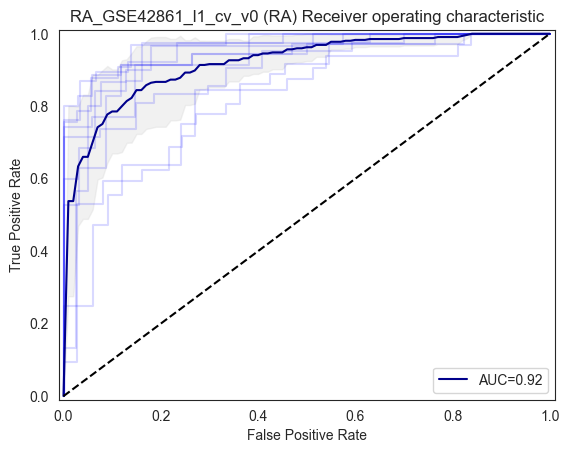

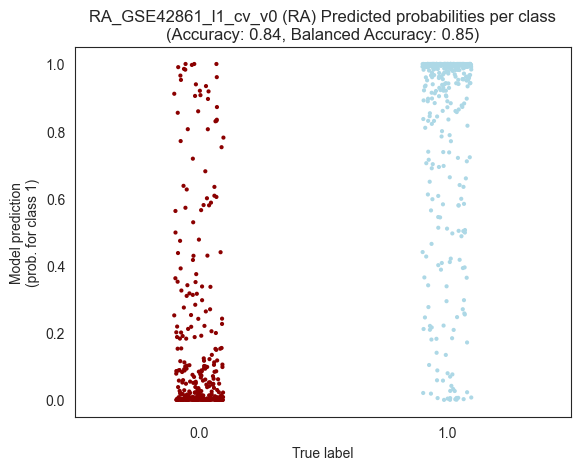

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       335
         1.0       0.87      0.82      0.84       354

    accuracy                           0.84       689
   macro avg       0.85      0.85      0.84       689
weighted avg       0.85      0.84      0.84       689


==========================RA_GSE42861_l2_cv_v0==========================


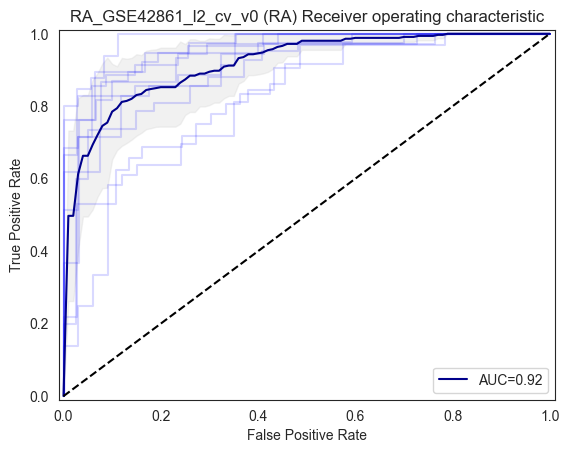

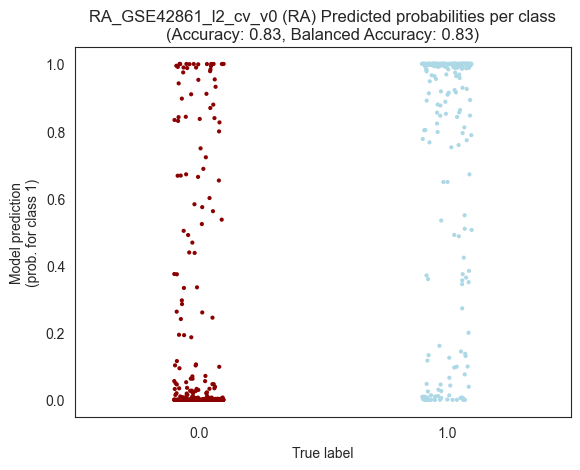

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       335
         1.0       0.84      0.82      0.83       354

    accuracy                           0.83       689
   macro avg       0.83      0.83      0.83       689
weighted avg       0.83      0.83      0.83       689


==========================RA_GSE111942_l1_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


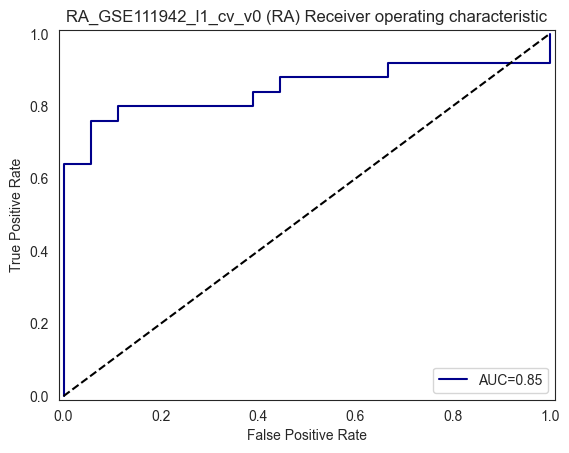

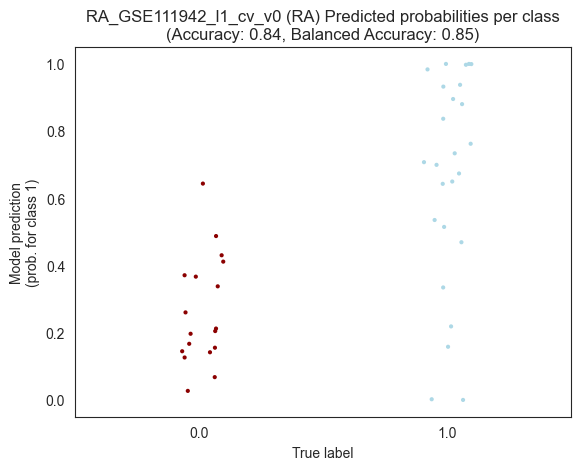

              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        18
         1.0       0.95      0.76      0.84        25

    accuracy                           0.84        43
   macro avg       0.84      0.85      0.84        43
weighted avg       0.86      0.84      0.84        43


==========================RA_GSE111942_l2_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


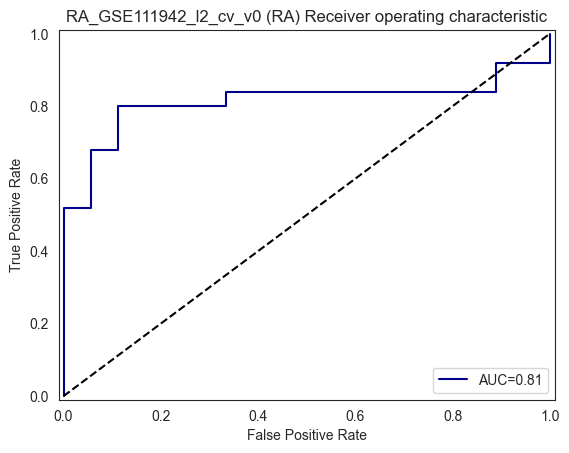

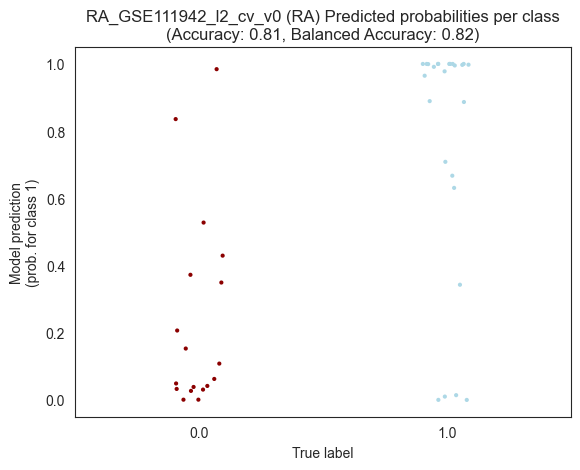

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.87      0.80      0.83        25

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43


==========================RA_GSE121192_l1_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


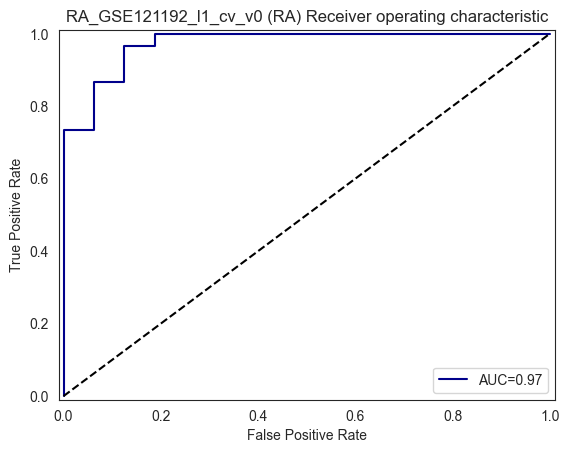

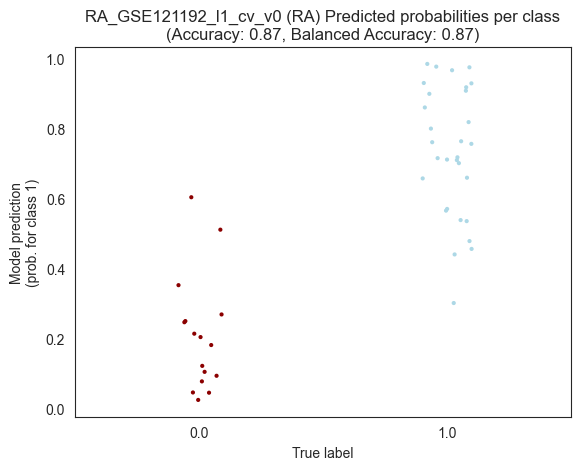

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        16
         1.0       0.93      0.87      0.90        30

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46


==========================RA_GSE121192_l2_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


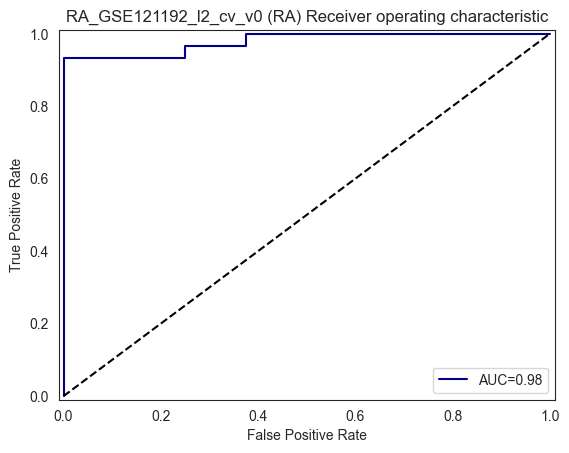

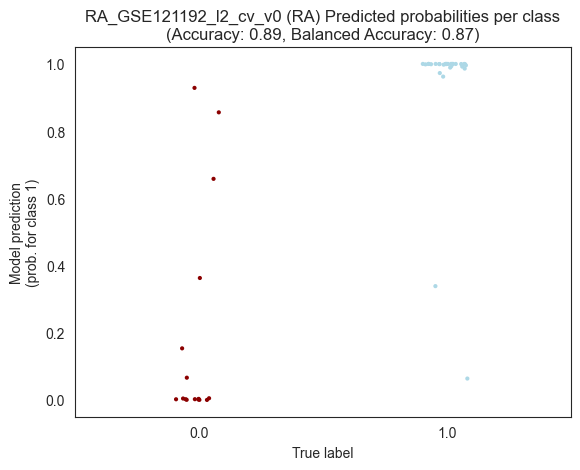

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84        16
         1.0       0.90      0.93      0.92        30

    accuracy                           0.89        46
   macro avg       0.88      0.87      0.88        46
weighted avg       0.89      0.89      0.89        46


==========================RA_GSE87095_l1_cv_v0==========================


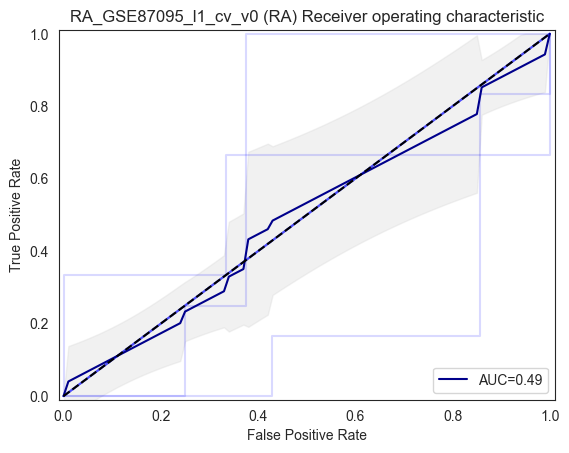

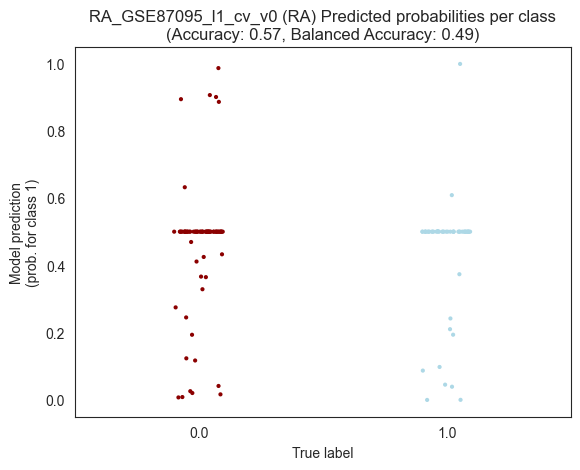

              precision    recall  f1-score   support

         0.0       0.59      0.92      0.72        73
         1.0       0.33      0.06      0.10        49

    accuracy                           0.57       122
   macro avg       0.46      0.49      0.41       122
weighted avg       0.49      0.57      0.47       122


==========================RA_GSE87095_l2_cv_v0==========================


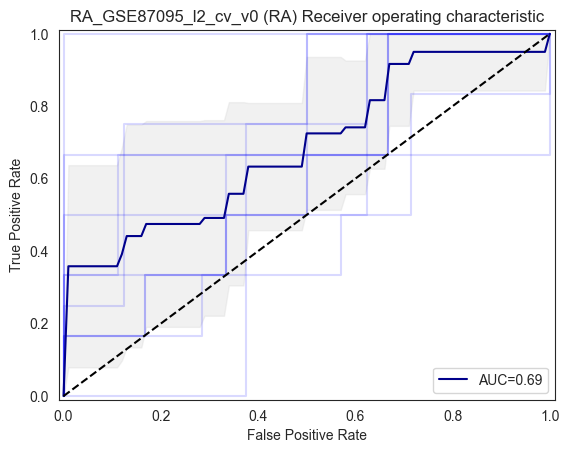

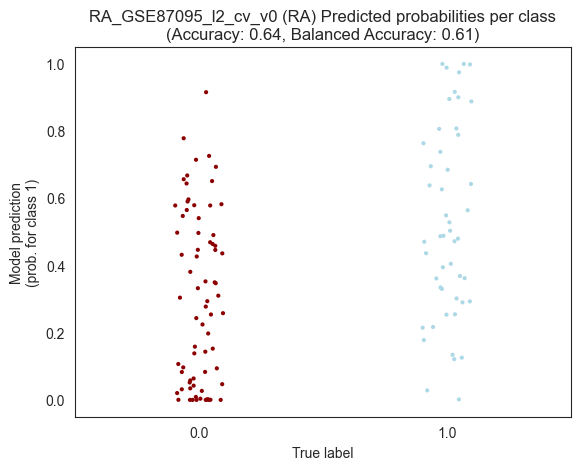

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71        73
         1.0       0.56      0.47      0.51        49

    accuracy                           0.64       122
   macro avg       0.62      0.61      0.61       122
weighted avg       0.63      0.64      0.63       122



In [104]:
for gse_acc in RA_datasets:
    l1_res_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    l2_res_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")

    l1_res = pickle.load(open(l1_res_f, 'rb'))
    l2_res = pickle.load(open(l2_res_f, 'rb'))

    l1_res["file_pfx"] = "RA_%s_l1_cv_v0"%gse_acc
    l2_res["file_pfx"] = "RA_%s_l2_cv_v0"%gse_acc

    for cv_res in [l1_res, l2_res]:
        print("\n==========================%s=========================="%cv_res["file_pfx"])
        mc.plot_cv_roc(cv_res, title_pfx=cv_res["file_pfx"] + " (RA)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_ROC.pdf"))
        mc.plot_pred_prob_by_labels(cv_res, title_pfx=cv_res["file_pfx"] + " (RA)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_class_pred_probs.pdf"))
        mc.print_report(cv_res, THRESH=0.5)



==========================PD_GSE145361_l1_cv_v0==========================


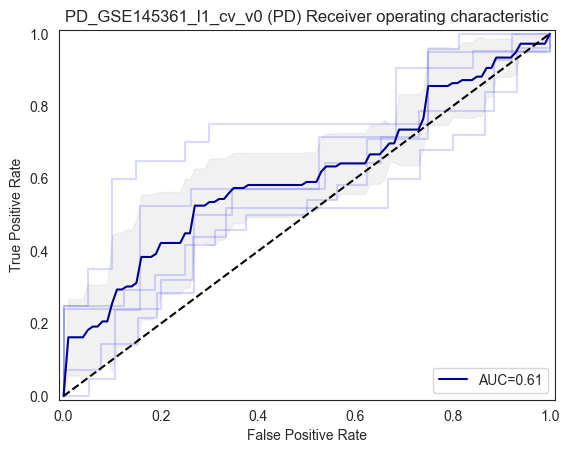

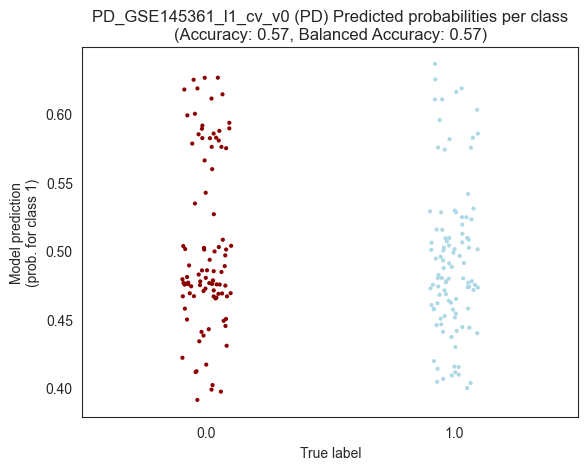

              precision    recall  f1-score   support

         0.0       0.49      0.61      0.54        96
         1.0       0.53      0.40      0.46       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200


==========================PD_GSE145361_l2_cv_v0==========================


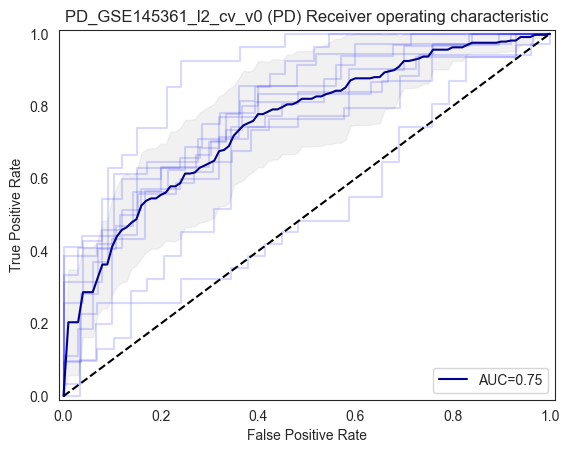

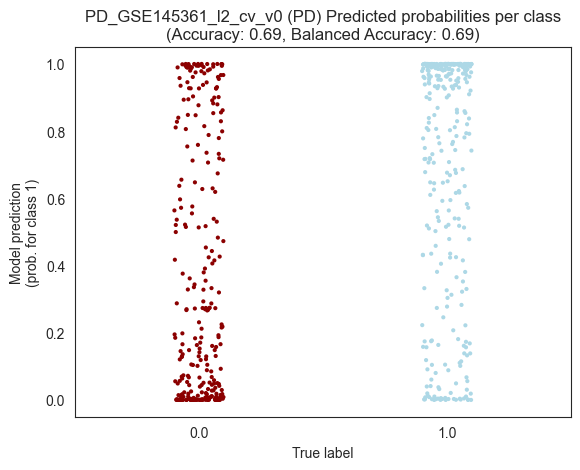

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       287
         1.0       0.69      0.72      0.70       313

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600


==========================PD_GSE111629_l1_cv_v0==========================


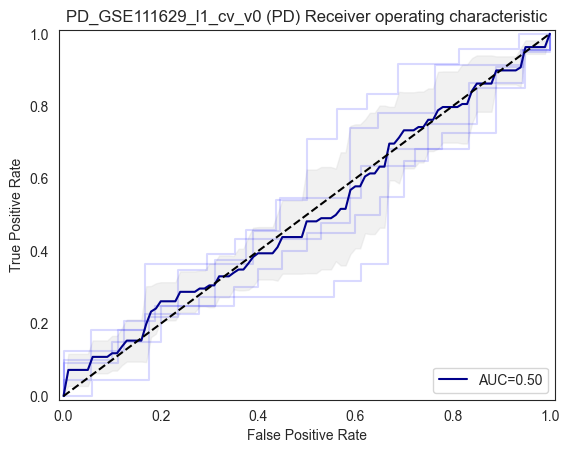

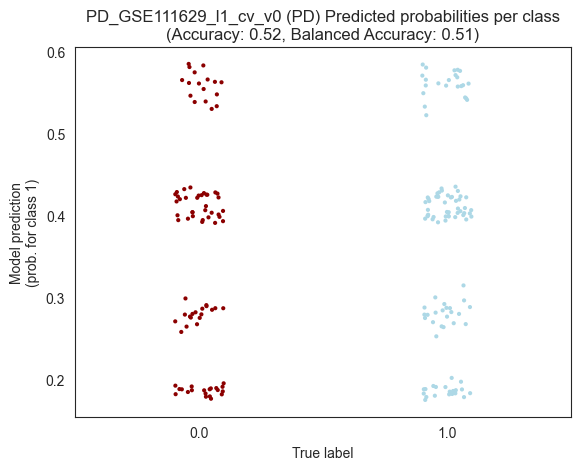

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        89
         1.0       0.57      0.21      0.30       111

    accuracy                           0.48       200
   macro avg       0.51      0.51      0.44       200
weighted avg       0.52      0.47      0.43       200


==========================PD_GSE111629_l2_cv_v0==========================


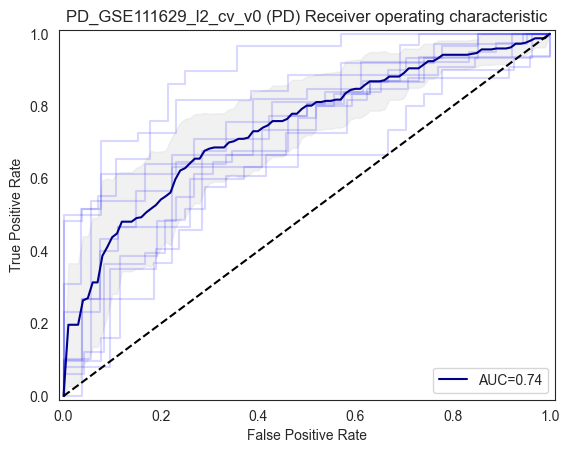

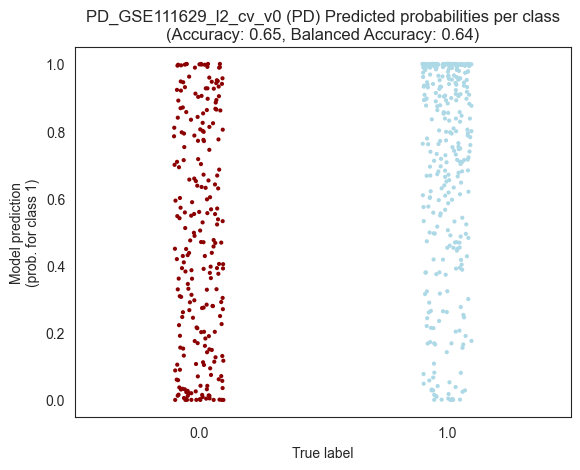

              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56       237
         1.0       0.69      0.74      0.71       334

    accuracy                           0.65       571
   macro avg       0.64      0.64      0.64       571
weighted avg       0.65      0.65      0.65       571


==========================PD_GSE190348_l1_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


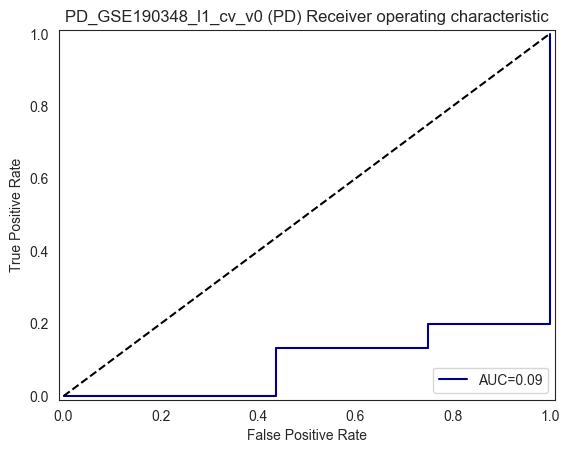

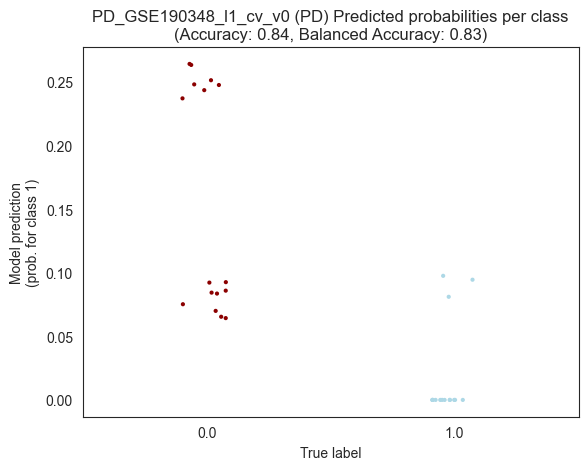

              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        16
         1.0       0.00      0.00      0.00        15

    accuracy                           0.52        31
   macro avg       0.26      0.50      0.34        31
weighted avg       0.27      0.52      0.35        31


==========================PD_GSE190348_l2_cv_v0==========================
Some CV folds could not be plotted (missing labels). Trying plot_cv_single_roc() instead.


/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

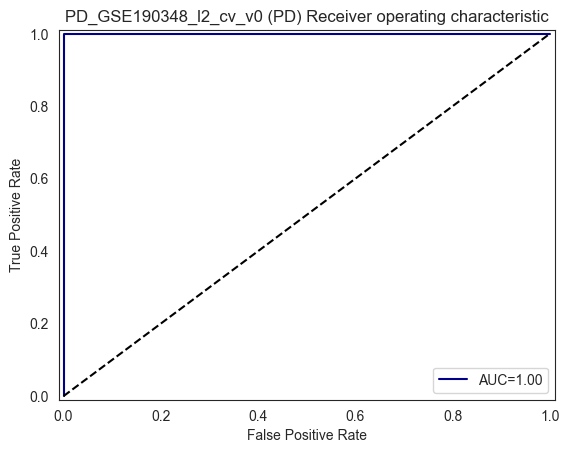

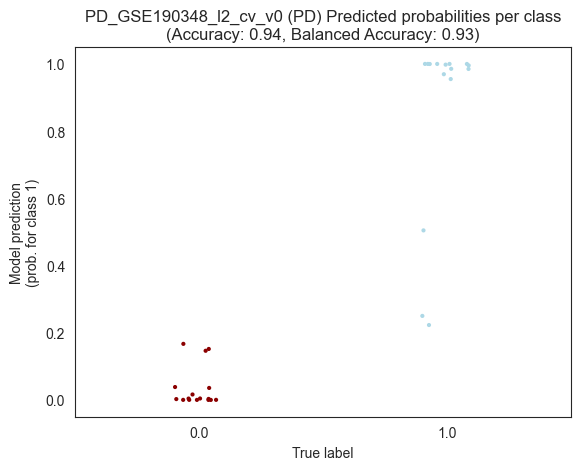

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31


==========================PD_GSE111223_l1_cv_v0==========================


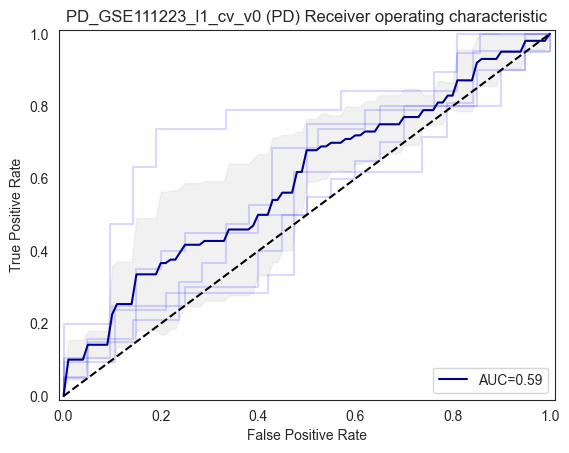

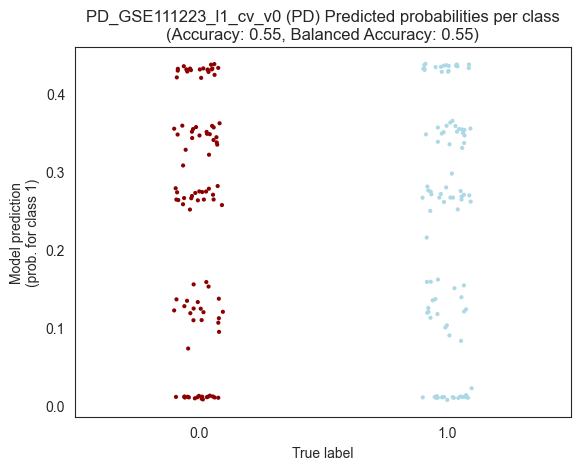

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67       101
         1.0       0.00      0.00      0.00        99

    accuracy                           0.51       200
   macro avg       0.25      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200


==========================PD_GSE111223_l2_cv_v0==========================


/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

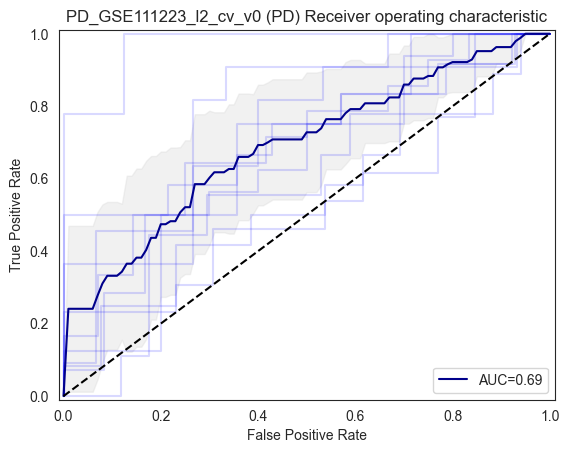

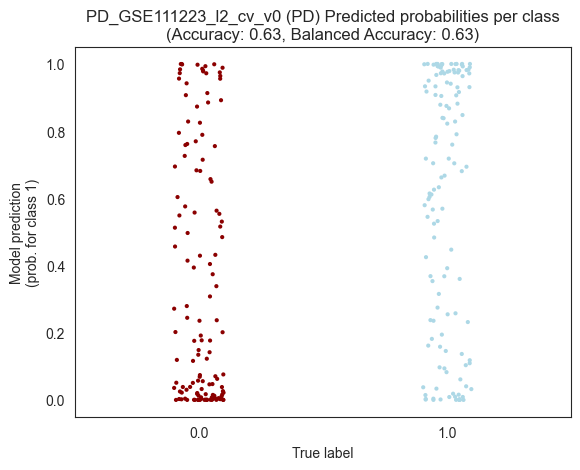

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       131
         1.0       0.63      0.62      0.63       128

    accuracy                           0.63       259
   macro avg       0.63      0.63      0.63       259
weighted avg       0.63      0.63      0.63       259



In [103]:
for gse_acc in PD_datasets:
    l1_res_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    l2_res_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")

    l1_res = pickle.load(open(l1_res_f, 'rb'))
    l2_res = pickle.load(open(l2_res_f, 'rb'))

    l1_res["file_pfx"] = "PD_%s_l1_cv_v0"%gse_acc
    l2_res["file_pfx"] = "PD_%s_l2_cv_v0"%gse_acc

    for cv_res in [l1_res, l2_res]:
        print("\n==========================%s=========================="%cv_res["file_pfx"])
        mc.plot_cv_roc(cv_res, title_pfx=cv_res["file_pfx"] + " (PD)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_ROC.pdf"))
        mc.plot_pred_prob_by_labels(cv_res, title_pfx=cv_res["file_pfx"] + " (PD)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_class_pred_probs.pdf"))
        mc.print_report(cv_res, THRESH=0.5)


GSE147221

==========================Sch_GSE147221_l1_cv_v0==========================


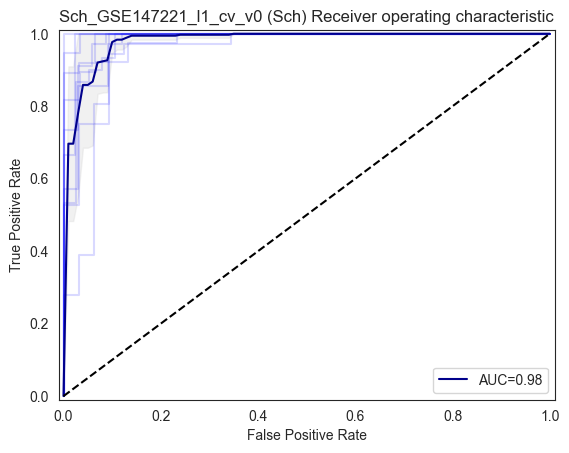

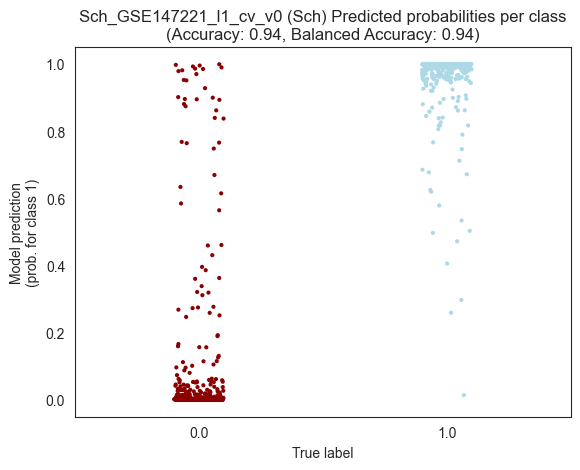

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       331
         1.0       0.91      0.98      0.95       348

    accuracy                           0.94       679
   macro avg       0.95      0.94      0.94       679
weighted avg       0.95      0.94      0.94       679


==========================Sch_GSE147221_l2_cv_v0==========================


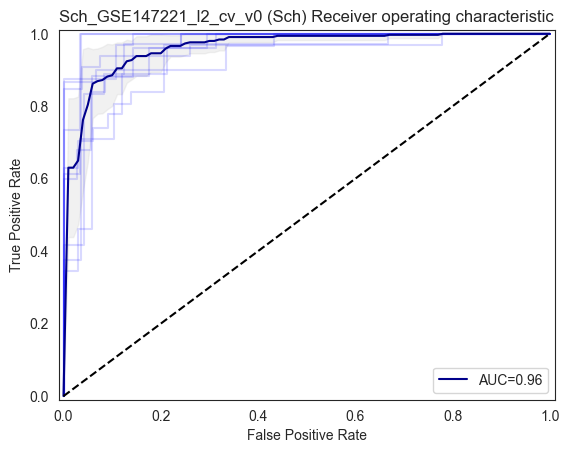

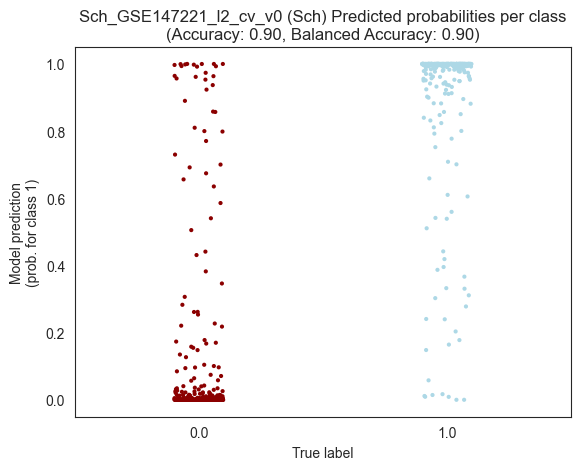

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       298
         1.0       0.89      0.92      0.90       302

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [113]:
for gse_acc in Sch_datasets:
    print(gse_acc)
    l1_res_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    l2_res_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    # GSE147221_l2_cv_res_v0

    l1_res = pickle.load(open(l1_res_f, 'rb'))
    l2_res = pickle.load(open(l2_res_f, 'rb'))

    l1_res["file_pfx"] = "Sch_%s_l1_cv_v0"%gse_acc
    l2_res["file_pfx"] = "Sch_%s_l2_cv_v0"%gse_acc

    for cv_res in [l1_res, l2_res]: #
        print("\n==========================%s=========================="%cv_res["file_pfx"])
        mc.plot_cv_roc(cv_res, title_pfx=cv_res["file_pfx"] + " (Sch)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_ROC.pdf"))
        mc.plot_pred_prob_by_labels(cv_res, title_pfx=cv_res["file_pfx"] + " (Sch)", out_f=os.path.join(figs_d, cv_res["file_pfx"]+"_class_pred_probs.pdf"))
        mc.print_report(cv_res, THRESH=0.5)


# --- END OF NOTEBOOK ---

# TMP

In [51]:
gse_acc = "GSE42861" # "GSE111942" #
l1_res_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
l2_res_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")

l1_res = pickle.load(open(l1_res_f, 'rb'))
l2_res = pickle.load(open(l2_res_f, 'rb'))

In [52]:
cv_res = l1_res

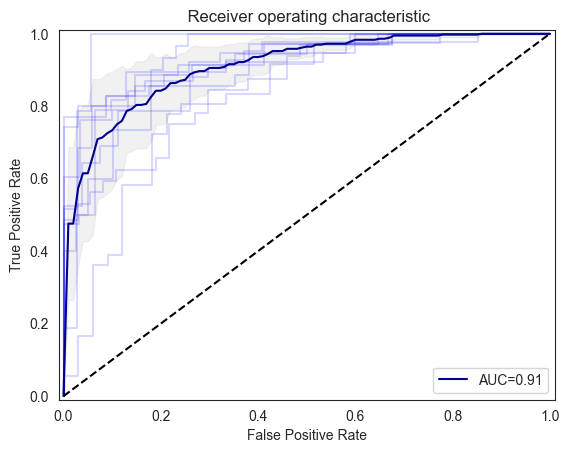

In [55]:
mc.plot_cv_roc(cv_res)

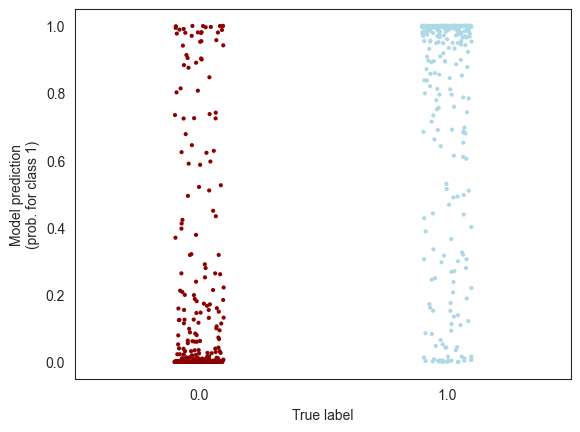

In [57]:
mc.plot_pred_prob_by_labels(cv_res)